![columns.png](./imgs/columns.png)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

### kill이 얼마나 승률에 영향을 미치는가

데이터전처리로 성능을 최대한 올리고 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from lightgbm.sklearn import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

from sklearn.metrics import mean_absolute_error

In [ ]:
base_path = ''

In [ ]:
df = pd.read_csv(base_path + 'train_V2.csv')

In [ ]:
df.head().T

,0,1,2,3,4
Id,7f96b2f878858a,eef90569b9d03c,1eaf90ac73de72,4616d365dd2853,315c96c26c9aac
groupId,4d4b580de459be,684d5656442f9e,6a4a42c3245a74,a930a9c79cd721,de04010b3458dd
matchId,a10357fd1a4a91,aeb375fc57110c,110163d8bb94ae,f1f1f4ef412d7e,6dc8ff871e21e6
assists,0,0,1,0,0
boosts,0,0,0,0,0
damageDealt,0.0,91.47,68.0,32.9,100.0
DBNOs,0,0,0,0,0
headshotKills,0,0,0,0,0
heals,0,0,0,0,0
killPlace,60,57,47,75,45


<AxesSubplot:>

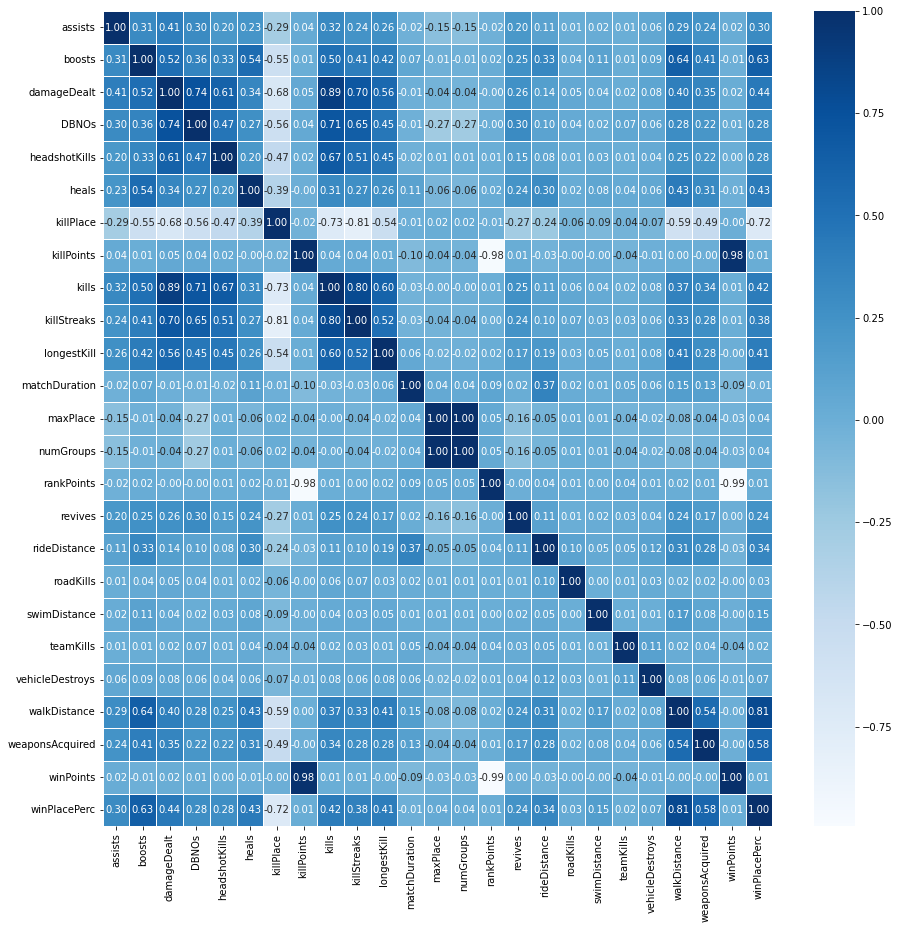

In [ ]:
# 상관관계 시각화
plt.figure(figsize=(15,15))
sns.heatmap(data = df.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

In [ ]:
# 전반적인 데이터의 특성 출력
df.describe().T

,count,mean,std,min,25%,50%,75%,max
assists,4446966.0,0.233815,0.588573,0.0,0.0,0.0000,0.000000,22.0
boosts,4446966.0,1.106908,1.715794,0.0,0.0,0.0000,2.000000,33.0
damageDealt,4446966.0,130.717138,170.780621,0.0,0.0,84.2400,186.000000,6616.0
DBNOs,4446966.0,0.657876,1.145743,0.0,0.0,0.0000,1.000000,53.0
headshotKills,4446966.0,0.226820,0.602155,0.0,0.0,0.0000,0.000000,64.0
heals,4446966.0,1.370147,2.679982,0.0,0.0,0.0000,2.000000,80.0
killPlace,4446966.0,47.599350,27.462937,1.0,24.0,47.0000,71.000000,101.0
killPoints,4446966.0,505.006042,627.504896,0.0,0.0,0.0000,1172.000000,2170.0
kills,4446966.0,0.924783,1.558445,0.0,0.0,0.0000,1.000000,72.0
killStreaks,4446966.0,0.543955,0.710972,0.0,0.0,0.0000,1.000000,20.0


승범 (5)
- killPlace
- kills
- killStreaks
- weaponsAcquired
- damageDealt

In [ ]:
# 내 컬럼 불러오기
use_df = df[['killPlace','kills','killStreaks','weaponsAcquired','matchDuration','headshotKills','longestKill','damageDealt','matchType', 'winPlacePerc']]
use_df.head(40)

,killPlace,kills,killStreaks,weaponsAcquired,matchDuration,headshotKills,longestKill,damageDealt,matchType,winPlacePerc
0,60,0,0,1,1306,0,0.000,0.000,squad-fpp,0.4444
1,57,0,0,5,1777,0,0.000,91.470,squad-fpp,0.6400
2,47,0,0,2,1318,0,0.000,68.000,duo,0.7755
3,75,0,0,3,1436,0,0.000,32.900,squad-fpp,0.1667
4,45,1,1,2,1424,0,58.530,100.000,solo-fpp,0.1875
5,44,1,1,1,1395,1,18.440,100.000,squad-fpp,0.0370
6,96,0,0,1,1316,0,0.000,0.000,squad-fpp,0.0000
7,48,0,0,6,1967,0,0.000,8.538,solo-fpp,0.7368
8,64,0,0,4,1375,0,0.000,51.600,squad,0.3704
9,74,0,0,1,1930,0,0.000,37.270,squad,0.2143


In [ ]:
# null값 없음
use_df.isna().sum()

killPlace          0
kills              0
killStreaks        0
weaponsAcquired    0
matchDuration      0
headshotKills      0
longestKill        0
damageDealt        0
matchType          0
winPlacePerc       1
dtype: int64

In [ ]:
# 각 컬럼 최대값 확인
use_df.max()

killPlace                101
kills                     72
killStreaks               20
weaponsAcquired          236
matchDuration           2237
headshotKills             64
longestKill           1094.0
damageDealt           6616.0
matchType          squad-fpp
winPlacePerc             1.0
dtype: object

In [ ]:
# 봇은 2020년 5월에 생김 -> 봇은 아님
use_df[use_df.kills == 72]

,killPlace,kills,killStreaks,weaponsAcquired,matchDuration,headshotKills,longestKill,damageDealt,matchType,winPlacePerc
3431247,1,72,7,35,1800,64,78.23,5990.0,normal-squad,1.0


In [ ]:
# 핵쟁이인가..??
use_df[use_df.headshotKills == 64]

,killPlace,kills,killStreaks,weaponsAcquired,matchDuration,headshotKills,longestKill,damageDealt,matchType,winPlacePerc
3431247,1,72,7,35,1800,64,78.23,5990.0,normal-squad,1.0


In [ ]:
use_df[use_df.damageDealt == 6616.0]

,killPlace,kills,killStreaks,weaponsAcquired,headshotKills,longestKill,damageDealt,matchType,winPlacePerc
334400,1,65,7,60,13,73.9,6616.0,normal-solo-fpp,1.0


In [ ]:
use_df[use_df.killStreaks == 20.0]

,killPlace,kills,killStreaks,weaponsAcquired,headshotKills,longestKill,damageDealt,matchType,winPlacePerc
3924729,1,40,20,2,35,621.8,3680.0,normal-squad-fpp,1.0


In [ ]:
from patsy import dmatrices
import statsmodels.api as sm;
from statsmodels.stats.outliers_influence import variance_inflation_factor
%matplotlib inline

<AxesSubplot:>

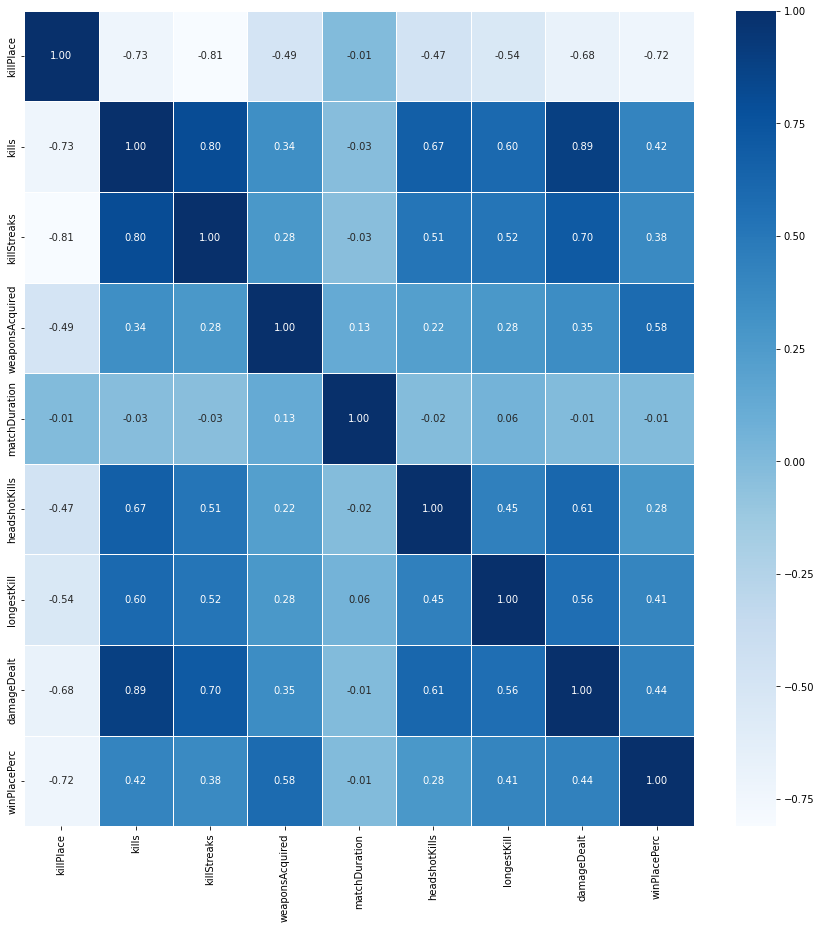

In [ ]:
# 내 컬럼 상관관계 확인
plt.figure(figsize=(15,15))
sns.heatmap(data = use_df.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

['killPlace','kills','killStreaks','weaponsAcquired','headshotKills','longestKill','damageDealt',


'matchType', 'winPlacePerc']

### 가정
- killplace와 kills의 상관관계는 왜 마이너스이지?? 킬수가 많으면 킬랭킹도 높지 않을까?? 아 킬수가 많을수록 숫자는 작아지기 떄문에 음의 상관관계를 가지는 구나, 
- killStreaks가 많을 수록 헤드샷이 을 것이다. 그러므로 killStreaks은 승률에 영향을 미칠 것인가??
- weaponsAcquired이 4이상 일때 주무기와 보조무기 외의 투척물을 사용할 확률이 있다고 가정한다. 그러므로 투척물이 많을수록 승률의 어떻게 영향을 주는지 확인해보자. 
- kills의 평균이 대략 10이다. 그리고 10 kill 이후의 값들은 작기때문에 제거한다. 하지만 10이후의 값들중에 특정 범위값에 1등이 많다면 제거하는 것을 고려해봐야한다. (확인해야함)

### killPlace

/Users/krc/miniforge3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='killPlace'>

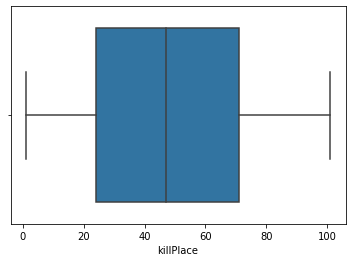

In [ ]:
sns.boxplot(use_df['killPlace'])

## kills

/Users/krc/miniforge3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='kills'>

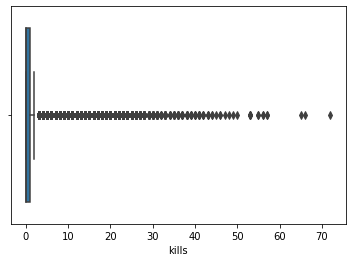

In [ ]:
sns.boxplot(use_df['kills'])

In [ ]:
# 평균이 대략 10이기 때문에 20이상의 값을 이상치로 잡는다.  
use_df[use_df['kills'] >= 20]

,killPlace,kills,killStreaks,weaponsAcquired,matchDuration,headshotKills,longestKill,damageDealt,matchType,winPlacePerc
2569,1,21,2,5,1376,8,192.10,2325.0,duo-fpp,1.0000
11892,3,20,6,13,898,4,37.08,1750.0,normal-solo-fpp,0.8947
19531,1,24,4,20,1195,3,84.23,2856.0,normal-squad-fpp,0.8000
37505,1,22,3,7,1877,17,670.90,2767.0,squad,0.9615
40047,5,22,3,33,1198,6,103.10,1988.0,normal-squad-fpp,1.0000
...,...,...,...,...,...,...,...,...,...,...
4390901,1,24,5,7,1319,8,436.70,2645.0,squad,1.0000
4399662,5,26,3,59,1559,1,33.05,1999.0,normal-squad-fpp,0.3333
4402706,3,28,4,31,1059,6,81.38,2817.0,normal-squad-fpp,0.4000
4420563,1,30,5,32,896,5,203.40,3297.0,normal-solo-fpp,1.0000


In [ ]:
# 최빈 값 
use_df['kills'].mode()

0    0
Name: kills, dtype: int64

/Users/krc/miniforge3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


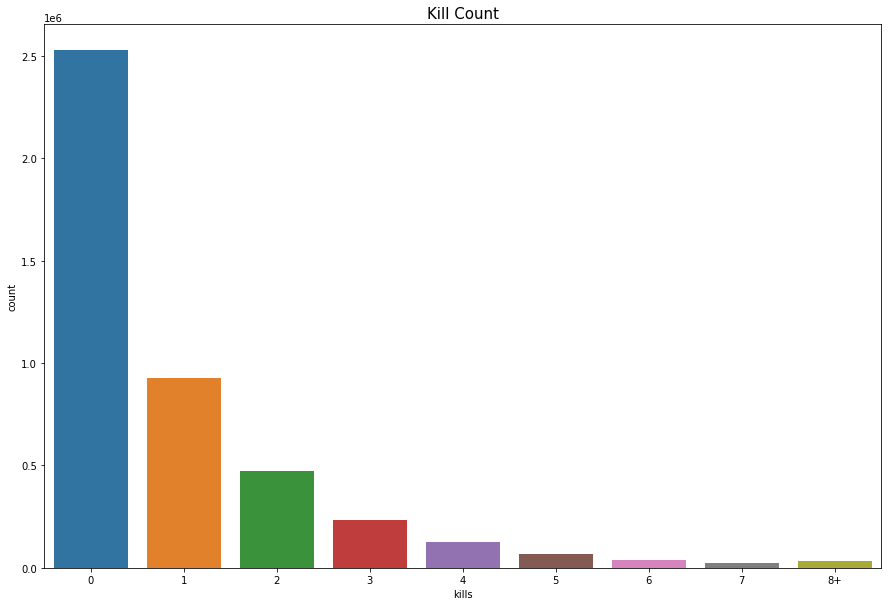

In [ ]:
# Kill 비율

data1 = use_df.copy() # .copy() 사본 생성
# loc = 행 or 열 조회하기
data1.loc[data1['kills'] > data1['kills'].quantile(0.99)] = '8+' 
# 99% 이상의 값들은 8+로 계산

plt.figure(figsize=(15,10))
sns.countplot(data1['kills'].astype('str').sort_values())
plt.title("Kill Count",fontsize=15)
plt.show()

In [ ]:
use_df.kills.value_counts()

In [ ]:
use_df['new_kills'] = 0
use_df

/var/folders/vl/3_6ksrvn7g56c54ypcf170ch0000gn/T/ipykernel_987/4264199015.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  use_df['new_kills'] = 0


,killPlace,kills,killStreaks,weaponsAcquired,matchDuration,headshotKills,longestKill,damageDealt,matchType,winPlacePerc,new_kills
0,60,0,0,1,1306,0,0.00,0.00,squad-fpp,0.4444,0
1,57,0,0,5,1777,0,0.00,91.47,squad-fpp,0.6400,0
2,47,0,0,2,1318,0,0.00,68.00,duo,0.7755,0
3,75,0,0,3,1436,0,0.00,32.90,squad-fpp,0.1667,0
4,45,1,1,2,1424,0,58.53,100.00,solo-fpp,0.1875,0
...,...,...,...,...,...,...,...,...,...,...,...
4446961,74,0,0,3,1873,0,0.00,0.00,squad-fpp,0.1786,0
4446962,69,0,0,6,1435,0,0.00,44.15,solo,0.2935,0
4446963,66,0,0,4,1321,0,0.00,59.06,squad-fpp,0.4815,0
4446964,11,2,1,8,1373,1,98.50,180.40,squad-fpp,0.8000,0


In [ ]:
da13 = use_df[(use_df.kills >= 13) & (use_df.kills < 15)]['kills'].mode()
da15 = use_df[(use_df.kills >= 15) & (use_df.kills < 20)]['kills'].mode()
da20 = use_df[(use_df.kills >= 20) & (use_df.kills < 25)]['kills'].mode()
da25 = use_df[(use_df.kills >= 25) & (use_df.kills < 30)]['kills'].mode()
da30 = use_df[(use_df.kills >= 30) & (use_df.kills < 40)]['kills'].mode()

da13, da15, da20, da25, da30

(0    13
 Name: kills, dtype: int64,
 0    15
 Name: kills, dtype: int64,
 0    20
 Name: kills, dtype: int64,
 0    25
 1    26
 Name: kills, dtype: int64,
 0    30
 1    31
 Name: kills, dtype: int64)

In [ ]:
# 킬의 그래프를 선형에 맞추기 위해서 범주형으로 만든다. 
use_df.loc[use_df.kills == 1,'new_kills'] = 1
use_df.loc[use_df.kills == 2,'new_kills'] = 2
use_df.loc[use_df.kills == 3,'new_kills'] = 3
use_df.loc[use_df.kills == 4,'new_kills'] = 4
use_df.loc[use_df.kills == 5,'new_kills'] = 5
use_df.loc[use_df.kills == 6,'new_kills'] = 6
use_df.loc[use_df.kills == 7,'new_kills'] = 7
use_df.loc[use_df.kills == 8,'new_kills'] = 8
use_df.loc[use_df.kills == 9,'new_kills'] = 9
use_df.loc[use_df.kills == 10,'new_kills'] = 10
use_df.loc[(use_df.kills >= 11) & (use_df.kills <= 12),'new_kills'] = 11
# 13부터 15미만 최빈값 10이기 때문에 10으로 설정
use_df.loc[(use_df.kills >= 13) & (use_df.kills < 15),'new_kills'] = 13
# 15부터 20까지 최빈값 15이기 때문에 15으로 설정
use_df.loc[(use_df.kills >= 15) & (use_df.kills < 20),'new_kills'] = 15
# 20부터 25까지 최빈값 20이기 때문에 20으로 설정
use_df.loc[(use_df.kills >= 20) & (use_df.kills < 25),'new_kills'] = 20
# 25부터 30까지 최빈값 25이기 때문에 25으로 설정
use_df.loc[(use_df.kills >= 25) & (use_df.kills <= 30),'new_kills'] = 25

# 30보다 큰 수를 30으로 처리함
use_df.loc[(use_df.kills > 30),'new_kills'] = 30

use_df

,killPlace,kills,killStreaks,weaponsAcquired,matchDuration,headshotKills,longestKill,damageDealt,matchType,winPlacePerc,new_kills
0,60,0,0,1,1306,0,0.00,0.00,squad-fpp,0.4444,0
1,57,0,0,5,1777,0,0.00,91.47,squad-fpp,0.6400,0
2,47,0,0,2,1318,0,0.00,68.00,duo,0.7755,0
3,75,0,0,3,1436,0,0.00,32.90,squad-fpp,0.1667,0
4,45,1,1,2,1424,0,58.53,100.00,solo-fpp,0.1875,1
...,...,...,...,...,...,...,...,...,...,...,...
4446961,74,0,0,3,1873,0,0.00,0.00,squad-fpp,0.1786,0
4446962,69,0,0,6,1435,0,0.00,44.15,solo,0.2935,0
4446963,66,0,0,4,1321,0,0.00,59.06,squad-fpp,0.4815,0
4446964,11,2,1,8,1373,1,98.50,180.40,squad-fpp,0.8000,2


In [ ]:
use_df[use_df['kills'] > 30]['killPlace'].mode()
# 킬수가 높으면 랭킹이 높아짐

0    1
Name: killPlace, dtype: int64

In [ ]:
use_df['new_kills'].value_counts()

0     2529722
1      928079
2      472466
3      232441
4      124543
5       66577
6       37960
7       21816
8       12779
9        7644
10       4599
11       4554
13       1894
15       1320
20        347
25        123
30        102
Name: new_kills, dtype: int64

/Users/krc/miniforge3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='new_kills'>

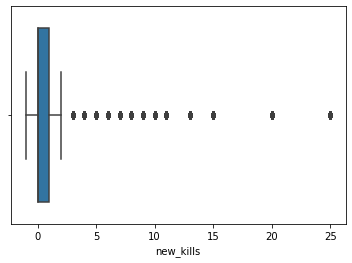

In [ ]:
sns.boxplot(use_df['new_kills'])

/Users/krc/miniforge3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


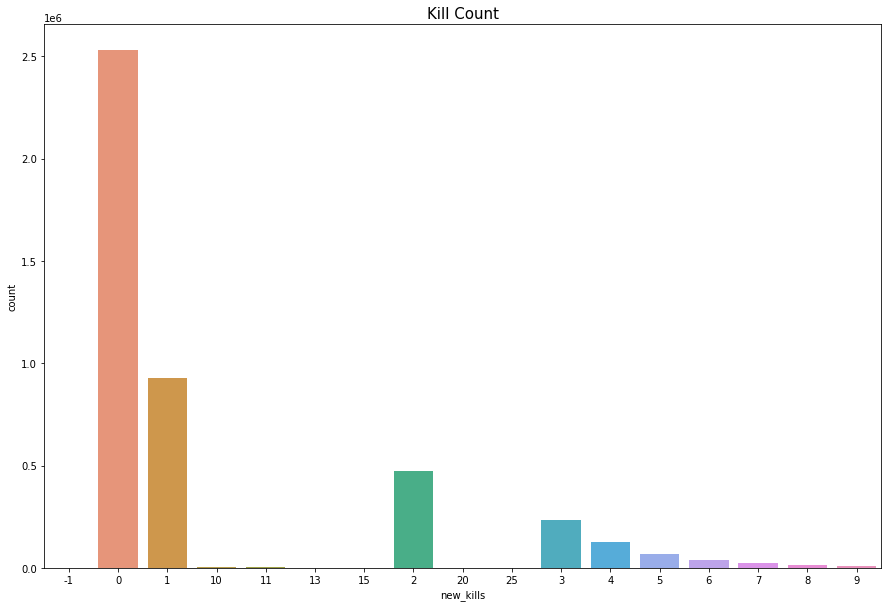

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(use_df['new_kills'].astype('str').sort_values())
plt.title("Kill Count",fontsize=15)
plt.show()

In [ ]:
use_df['new_kills'].unique()

array([ 0,  1,  4,  2,  9,  3,  5,  6,  8,  7, 13, 15, 11, 20, 10, 30, 25])

In [ ]:
use_df[use_df['kills'] == 1]['killPlace'].mode()

0    29
Name: killPlace, dtype: int64

In [ ]:
kill = []

for i in use_df['new_kills'].unique():
    a = use_df[use_df['new_kills'] == i]['killPlace'].mode()
    kill.append(a)

print(kill)

# 7명 킬부터 랭킹의 최빈값은 1이다.  

[0    55
Name: killPlace, dtype: int64, 0    29
Name: killPlace, dtype: int64, 0    5
Name: killPlace, dtype: int64, 0    16
Name: killPlace, dtype: int64, 0    1
Name: killPlace, dtype: int64, 0    9
Name: killPlace, dtype: int64, 0    3
Name: killPlace, dtype: int64, 0    2
Name: killPlace, dtype: int64, 0    1
Name: killPlace, dtype: int64, 0    1
Name: killPlace, dtype: int64, 0    1
Name: killPlace, dtype: int64, 0    1
Name: killPlace, dtype: int64, 0    1
Name: killPlace, dtype: int64, 0    1
Name: killPlace, dtype: int64, 0    1
Name: killPlace, dtype: int64, 0    1
Name: killPlace, dtype: int64, 0    1
Name: killPlace, dtype: int64]


## weaponsAcquired

In [ ]:
use_df[use_df['weaponsAcquired'] >= 20]

,killPlace,kills,killStreaks,weaponsAcquired,headshotKills,longestKill,damageDealt,matchType,winPlacePerc,new_kills
1292,7,15,3,43,6,69.880,1750.0,normal-squad-fpp,0.7143,15
2769,4,11,2,28,4,21.610,970.5,normal-duo,1.0000,11
5629,58,0,0,21,0,0.000,0.0,duo-fpp,0.5745,0
6673,33,3,1,22,0,6.523,346.6,normal-squad-fpp,0.6000,3
12199,45,5,1,21,2,28.200,487.0,normal-squad-fpp,0.0000,5
...,...,...,...,...,...,...,...,...,...,...
4439894,11,10,2,20,1,29.210,843.9,normal-squad-fpp,0.7500,10
4440136,13,10,2,23,2,63.710,1027.0,normal-squad-fpp,1.0000,10
4442804,47,2,1,20,0,35.210,262.9,normal-squad-fpp,1.0000,2
4443350,20,6,1,20,1,198.900,548.0,normal-solo-fpp,0.4783,6


/Users/krc/miniforge3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='weaponsAcquired'>

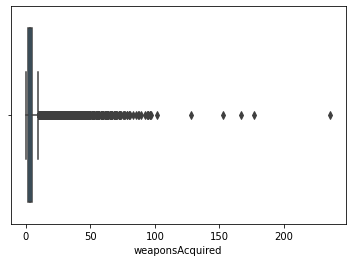

In [ ]:
sns.boxplot(use_df['weaponsAcquired'])

In [ ]:
# 무기교체 최빈값 2번 교체 - 이건 일찍 죽은사람이 많아서 인듯 떄문일듯 
use_df['weaponsAcquired'].mode()

0    2
Name: weaponsAcquired, dtype: int64

In [ ]:
# 평균값이 4
# 수류탄 사용했다고 가정
use_df[(use_df['weaponsAcquired'] >= 4) & (use_df['weaponsAcquired'] < 20)]

,killPlace,kills,killStreaks,weaponsAcquired,headshotKills,longestKill,damageDealt,matchType,winPlacePerc,new_kills
1,57,0,0,5,0,0.00,91.470,squad-fpp,0.6400,0
7,48,0,0,6,0,0.00,8.538,solo-fpp,0.7368,0
8,64,0,0,4,0,0.00,51.600,squad,0.3704,0
10,75,0,0,9,0,0.00,28.380,squad-fpp,0.3929,0
12,37,0,0,6,0,0.00,0.000,squad-fpp,0.9286,0
...,...,...,...,...,...,...,...,...,...,...
4446956,77,0,0,7,0,0.00,151.900,squad-fpp,0.1071,0
4446962,69,0,0,6,0,0.00,44.150,solo,0.2935,0
4446963,66,0,0,4,0,0.00,59.060,squad-fpp,0.4815,0
4446964,11,2,1,8,1,98.50,180.400,squad-fpp,0.8000,2


In [ ]:
use_df[(use_df['weaponsAcquired'] >= 20) & (use_df['weaponsAcquired'] < 30)]

,killPlace,kills,killStreaks,weaponsAcquired,headshotKills,longestKill,damageDealt,matchType,winPlacePerc,new_kills
2769,4,11,2,28,4,21.610,970.5,normal-duo,1.0000,11
5629,58,0,0,21,0,0.000,0.0,duo-fpp,0.5745,0
6673,33,3,1,22,0,6.523,346.6,normal-squad-fpp,0.6000,3
12199,45,5,1,21,2,28.200,487.0,normal-squad-fpp,0.0000,5
12730,7,13,2,25,6,150.200,2069.0,normal-squad-fpp,0.8333,13
...,...,...,...,...,...,...,...,...,...,...
4439894,11,10,2,20,1,29.210,843.9,normal-squad-fpp,0.7500,10
4440136,13,10,2,23,2,63.710,1027.0,normal-squad-fpp,1.0000,10
4442804,47,2,1,20,0,35.210,262.9,normal-squad-fpp,1.0000,2
4443350,20,6,1,20,1,198.900,548.0,normal-solo-fpp,0.4783,6


In [ ]:
use_df[(use_df['weaponsAcquired'] >= 20) & (use_df['weaponsAcquired'] < 30)]['killPlace'].mode()

0    4
1    5
Name: killPlace, dtype: int64

In [ ]:
use_df[(use_df['weaponsAcquired'] >= 30) & (use_df['weaponsAcquired'] < 40)]

,killPlace,kills,killStreaks,weaponsAcquired,headshotKills,longestKill,damageDealt,matchType,winPlacePerc,new_kills
26480,9,15,2,30,5,240.50,1973.0,normal-squad-fpp,0.8571,15
27212,49,0,0,36,0,0.00,0.0,normal-squad-fpp,0.0000,0
31936,5,16,2,38,3,77.03,1479.0,normal-squad-fpp,1.0000,15
37903,24,8,2,34,2,125.00,755.1,normal-squad-fpp,0.6000,8
40047,5,22,3,33,6,103.10,1988.0,normal-squad-fpp,1.0000,20
...,...,...,...,...,...,...,...,...,...,...
4418082,15,11,2,33,2,132.40,1857.0,normal-squad-fpp,0.1429,11
4418629,7,14,2,34,2,52.12,1634.0,normal-solo-fpp,0.6842,13
4420563,1,30,5,32,5,203.40,3297.0,normal-solo-fpp,1.0000,25
4425757,16,11,3,32,2,60.49,1266.0,normal-squad-fpp,0.0000,11


In [ ]:
use_df[(use_df['weaponsAcquired'] >= 30) & (use_df['weaponsAcquired'] < 40)]['killPlace'].mode()

0    2
Name: killPlace, dtype: int64

In [ ]:
use_df[(use_df['weaponsAcquired'] >= 10) & (use_df['weaponsAcquired'] < 20)]

,killPlace,kills,killStreaks,weaponsAcquired,headshotKills,longestKill,damageDealt,matchType,winPlacePerc,new_kills
278,46,0,0,11,0,0.000,0.00,squad-fpp,0.6154,0
331,2,6,2,10,2,55.480,500.10,squad-fpp,0.8889,6
336,30,1,1,10,1,34.390,100.00,duo,0.7551,1
356,45,0,0,10,0,0.000,183.70,duo-fpp,0.8958,0
523,26,1,1,11,0,162.400,49.66,squad-fpp,0.8519,1
...,...,...,...,...,...,...,...,...,...,...
4446773,40,0,0,11,0,0.000,153.90,duo-fpp,0.9592,0
4446800,16,2,1,10,2,171.800,240.90,duo-fpp,0.8936,2
4446851,2,6,2,11,2,54.870,886.30,squad-fpp,1.0000,6
4446880,11,2,1,11,0,126.600,336.00,duo-fpp,0.9792,2


In [ ]:
use_df[(use_df['weaponsAcquired'] >= 10) & (use_df['weaponsAcquired'] < 15)]['killPlace'].mode(), use_df[(use_df['weaponsAcquired'] >= 15) & (use_df['weaponsAcquired'] < 20)]['killPlace'].mode()

(0    1
 Name: killPlace, dtype: int64,
 0    2
 Name: killPlace, dtype: int64)

In [ ]:
use_df[(use_df['weaponsAcquired'] >= 10) & (use_df['weaponsAcquired'] < 13)]['killPlace'].mode(), use_df[(use_df['weaponsAcquired'] >= 13) & (use_df['weaponsAcquired'] < 15)]['killPlace'].mode()

(0    1
 Name: killPlace, dtype: int64,
 0    1
 Name: killPlace, dtype: int64)

In [ ]:
use_df[(use_df['weaponsAcquired'] >= 0) & (use_df['weaponsAcquired'] < 10)]

,killPlace,kills,killStreaks,weaponsAcquired,headshotKills,longestKill,damageDealt,matchType,winPlacePerc,new_kills
0,60,0,0,1,0,0.00,0.00,squad-fpp,0.4444,0
1,57,0,0,5,0,0.00,91.47,squad-fpp,0.6400,0
2,47,0,0,2,0,0.00,68.00,duo,0.7755,0
3,75,0,0,3,0,0.00,32.90,squad-fpp,0.1667,0
4,45,1,1,2,0,58.53,100.00,solo-fpp,0.1875,1
...,...,...,...,...,...,...,...,...,...,...
4446961,74,0,0,3,0,0.00,0.00,squad-fpp,0.1786,0
4446962,69,0,0,6,0,0.00,44.15,solo,0.2935,0
4446963,66,0,0,4,0,0.00,59.06,squad-fpp,0.4815,0
4446964,11,2,1,8,1,98.50,180.40,squad-fpp,0.8000,2


In [ ]:
use_df[(use_df['weaponsAcquired'] >= 0) & (use_df['weaponsAcquired'] < 5)]['killPlace'].mode()

0    83
Name: killPlace, dtype: int64

In [ ]:
use_df[(use_df['weaponsAcquired'] >= 5) & (use_df['weaponsAcquired'] < 8)]['killPlace'].mode(), use_df[(use_df['weaponsAcquired'] >= 8) & (use_df['weaponsAcquired'] < 10)]['killPlace'].mode()

(0    1
 Name: killPlace, dtype: int64,
 0    1
 Name: killPlace, dtype: int64)

- 무기 교체 5~15에서 킬 랭킹이 1위를 찍음


- 플레이 시간이 길수록 무기교체가 많이 일어나고 랭킹이 높아지면서 승률에 영향을 준다.는 가설을 새움 

In [ ]:
use_df[(use_df['weaponsAcquired'] >= 5) & (use_df['weaponsAcquired'] < 15)]['matchDuration'].max(), use_df[(use_df['weaponsAcquired'] >= 5) & (use_df['weaponsAcquired'] < 15)]['matchDuration'].min()

(2237, 314)

### killStreaks가 많을 수록 헤드샷이 많을 것이다. 그러므로 killStreaks은 승률에 영향을 미칠 것인가??

In [ ]:
use_df[use_df['killStreaks'] > 10]['headshotKills'].mode()

0     5
1    11
Name: headshotKills, dtype: int64

In [ ]:
use_df[use_df['killStreaks'] == 0]['headshotKills']

0          0
1          0
2          0
3          0
6          0
          ..
4446958    0
4446959    0
4446961    0
4446962    0
4446963    0
Name: headshotKills, Length: 2529722, dtype: int64

In [ ]:
use_df[use_df['killStreaks'] == 1]['headshotKills']

4          0
5          1
13         1
14         0
16         0
          ..
4446949    0
4446950    0
4446957    0
4446964    1
4446965    0
Name: headshotKills, Length: 1475558, dtype: int64

In [ ]:
use_df[use_df['killStreaks'] == 2]['headshotKills']

23         2
24         1
25         0
27         1
38         0
          ..
4446898    0
4446912    1
4446923    0
4446942    4
4446948    1
Name: headshotKills, Length: 389346, dtype: int64

In [ ]:
use_df[use_df['killStreaks'] == 3]['headshotKills']

300        3
551        2
597        1
600        1
749        0
          ..
4446734    2
4446836    0
4446883    0
4446910    0
4446960    2
Name: headshotKills, Length: 45958, dtype: int64

In [ ]:
use_df[use_df['killStreaks'] < 5]

,killPlace,kills,killStreaks,weaponsAcquired,matchDuration,headshotKills,longestKill,damageDealt,matchType,winPlacePerc,new_kills
0,60,0,0,1,1306,0,0.00,0.00,squad-fpp,0.4444,0
1,57,0,0,5,1777,0,0.00,91.47,squad-fpp,0.6400,0
2,47,0,0,2,1318,0,0.00,68.00,duo,0.7755,0
3,75,0,0,3,1436,0,0.00,32.90,squad-fpp,0.1667,0
4,45,1,1,2,1424,0,58.53,100.00,solo-fpp,0.1875,1
...,...,...,...,...,...,...,...,...,...,...,...
4446961,74,0,0,3,1873,0,0.00,0.00,squad-fpp,0.1786,0
4446962,69,0,0,6,1435,0,0.00,44.15,solo,0.2935,0
4446963,66,0,0,4,1321,0,0.00,59.06,squad-fpp,0.4815,0
4446964,11,2,1,8,1373,1,98.50,180.40,squad-fpp,0.8000,2


In [ ]:
use_df[use_df['killStreaks'] < 5]['headshotKills'].mean()

0.2261462633495978

In [ ]:
use_df[(use_df['killStreaks'] >= 5) & (use_df['killStreaks'] < 10)]

,killPlace,kills,killStreaks,weaponsAcquired,matchDuration,headshotKills,longestKill,damageDealt,matchType,winPlacePerc,new_kills
7745,1,7,5,7,2112,5,167.3000,774.7,duo,0.8667,7
9208,1,9,6,5,1804,0,0.8649,991.1,squad-fpp,0.7037,9
11892,3,20,6,13,898,4,37.0800,1750.0,normal-solo-fpp,0.8947,20
15347,1,11,7,3,905,0,39.0900,1085.0,crashfpp,0.8571,11
18036,1,6,5,2,1331,2,49.0500,482.8,squad-fpp,1.0000,6
...,...,...,...,...,...,...,...,...,...,...,...
4402493,1,9,8,3,1531,3,3.6280,747.7,solo,0.8696,9
4402853,2,13,6,6,1817,7,465.0000,1065.0,squad,1.0000,13
4406425,1,6,5,2,1888,4,21.0700,622.5,squad-fpp,0.5000,6
4420563,1,30,5,32,896,5,203.4000,3297.0,normal-solo-fpp,1.0000,25


In [ ]:
use_df[(use_df['killStreaks'] >= 5) & (use_df['killStreaks'] < 10)]['headshotKills'].mode()

0    0
Name: headshotKills, dtype: int64

In [ ]:
use_df[(use_df['killStreaks'] >= 5) & (use_df['killStreaks'] < 10)]['headshotKills'].mean()

4.278560250391236

In [ ]:
use_df[(use_df['killStreaks'] >= 10) & (use_df['killStreaks'] < 20)]

,killPlace,kills,killStreaks,weaponsAcquired,matchDuration,headshotKills,longestKill,damageDealt,matchType,winPlacePerc,new_kills
72720,2,11,10,2,1250,4,1.858,1100.0,solo,0.4384,11
124986,1,14,14,8,1473,4,0.000,1400.0,solo,0.5342,13
539354,1,18,11,3,1389,17,36.760,1800.0,solo,0.7024,15
719714,1,12,10,5,1890,2,94.930,1161.0,squad,0.7500,11
939616,1,24,11,10,384,15,230.600,2189.0,normal-solo-fpp,1.0000,20
999741,1,15,12,2,1342,9,37.240,1651.0,solo,0.6477,15
1041284,2,12,11,5,1836,11,10.450,1221.0,solo,0.8953,11
1391066,1,13,13,3,1423,11,0.000,808.8,solo,0.7802,13
2020831,1,53,10,14,833,46,690.400,4889.0,normal-squad-fpp,1.0000,30
2035432,1,13,13,7,1354,8,14.310,1300.0,solo,0.6667,13


In [ ]:
use_df[(use_df['killStreaks'] >= 10) & (use_df['killStreaks'] < 20)]['headshotKills'].mode()

0     5
1    11
Name: headshotKills, dtype: int64

In [ ]:
use_df[(use_df['killStreaks'] >= 20) & (use_df['killStreaks'] < 30)]

,killPlace,kills,killStreaks,weaponsAcquired,matchDuration,headshotKills,longestKill,damageDealt,matchType,winPlacePerc,new_kills
3924729,1,40,20,2,799,35,621.8,3680.0,normal-squad-fpp,1.0,30


In [ ]:
use_df[(use_df['killStreaks'] >= 20) & (use_df['killStreaks'] < 30)]['headshotKills'].mode()

0    35
Name: headshotKills, dtype: int64

killStreaks과 headshotKills은 양의 상관관계가 있다. 